In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils   #第一部分，初始化
import reg_utils    #第二部分，正则化
import gc_utils     #第三部分，梯度校验
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# 不同初始化参数 

## 加载数据

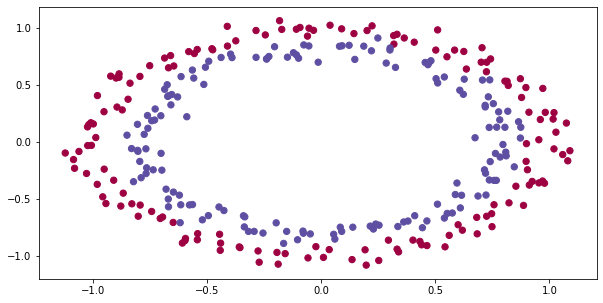

In [2]:
train_X, train_Y, test_X, test_Y = init_utils.load_dataset(is_plot=True)

## 建立模型

In [3]:
#  建立一个三层模型，并带有三种初始化的方式
def model(X,Y,learning_rate=0.01,num_iterations=15000,print_cost=True,initialization="he",is_plot=True):
    """
        参数：
            X - 输入的数据，维度为(2, 要训练/测试的数量)
            Y - 标签，【0 | 1】，维度为(1，对应的是输入的数据的标签)
            learning_rate - 学习速率
            num_iterations - 迭代的次数
            print_cost - 是否打印成本值，每迭代1000次打印一次
            initialization - 字符串类型，初始化的类型【"zeros" | "random" | "he"】
            is_polt - 是否绘制梯度下降的曲线图
        
        返回：
            parameters - 学习后的参数
            
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims=[X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
            parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
            parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
            parameters = initialize_parameters_he(layers_dims)
    else :
        print("错误初始化，退出程序！")
        exit
    
    
    for i in range(0, num_iterations):
        # 前向传播
        a3, cache = init_utils.forward_propagation(X, parameters=parameters)
        # 计算损失
        cost = init_utils.compute_loss(a3, Y)
        # 反向传播
        grads = init_utils.backward_propagation(X, Y, cache)
        # 跟新参数
        parameters = init_utils.update_parameters(parameters,grads,learning_rate)
        
        if i % 1000 == 0:
            costs.append(cost)
            # 打印成本
            if print_cost:
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))
        
    
    #学习完毕，绘制成本曲线
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    #返回学习完毕后的参数
    return parameters    

In [4]:
# 初始化方式为0
def initialize_parameters_zeros(layers_dims):
    """
        将模型的参数全部设置为0

        参数：
            layers_dims - 列表，模型的层数和对应每一层的节点的数量
        返回
            parameters - 包含了所有W和b的字典
                W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
                b1 - 偏置向量，维度为（layers_dims[1],1）
                ···
                WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
                bL - 偏置向量，维度为（layers_dims[L],1）
    """
    parameters = {}
    # 对每一层进行初始化
    L = len(layers_dims)
    for i in range(1, L):
        parameters["W" + str(i)] = np.zeros((layers_dims[i], layers_dims[i-1]))
        parameters["b" + str(i)] = np.zeros((layers_dims[i], 1))
        
        assert(parameters["W" + str(i)].shape == (layers_dims[i], layers_dims[i-1]))
        assert(parameters["b" + str(i)].shape == (layers_dims[i], 1))
    
    return parameters

In [5]:
# 测试0初始化
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


第0次迭代，成本值为：0.6931471805599453
第1000次迭代，成本值为：0.6931471805599453
第2000次迭代，成本值为：0.6931471805599453
第3000次迭代，成本值为：0.6931471805599453
第4000次迭代，成本值为：0.6931471805599453
第5000次迭代，成本值为：0.6931471805599453
第6000次迭代，成本值为：0.6931471805599453
第7000次迭代，成本值为：0.6931471805599453
第8000次迭代，成本值为：0.6931471805599453
第9000次迭代，成本值为：0.6931471805599453
第10000次迭代，成本值为：0.6931471805599455
第11000次迭代，成本值为：0.6931471805599453
第12000次迭代，成本值为：0.6931471805599453
第13000次迭代，成本值为：0.6931471805599453
第14000次迭代，成本值为：0.6931471805599453


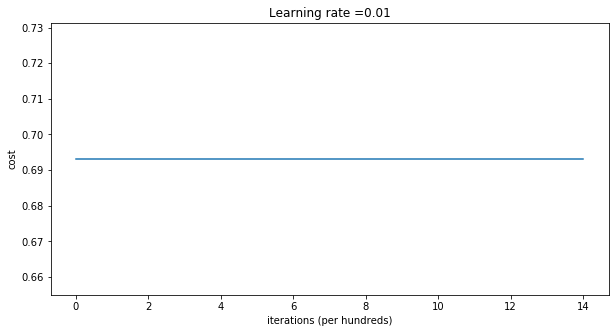

In [8]:
# 测试0初始化的学习效果
parameters = model(train_X, train_Y, initialization = "zeros",is_plot=True)

In [9]:
# 查看预测
print("训练集准确率")
prediction_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集准确率")
prediction_test = init_utils.predict(test_X, test_Y, parameters)


训练集准确率
Accuracy: 0.5
测试集准确率
Accuracy: 0.5


训练集的预测结果： [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
测试集的预测结果： [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


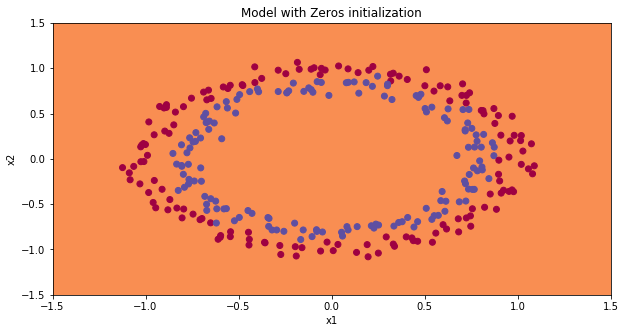

In [10]:
print("训练集的预测结果：", prediction_train)
print("测试集的预测结果：", prediction_test)


plt.title("Model with Zeros initialization")
axes = plt.gca()
# 将坐标轴重调，缩放图像
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
# 绘制测试预测的边界
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, train_Y)

该初始化方式的损失一直没有下降，且没有做到分界，因为网络无法打破对称性，就是所有层内的神经元都是在处理同样的函数，所以无法进行的特征提取

In [11]:
# 进行随机初始化，且有数值较大的参数
def initialize_parameters_random(layers_dims):
    """
    参数：
        layers_dims - 列表，模型的层数和对应每一层的节点的数量
    返回
        parameters - 包含了所有W和b的字典
            W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[1],1）
            ···
            WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
            b1 - 偏置向量，维度为（layers_dims[L],1）
    """
    
    np.random.seed(3)               # 指定随机种子
    parameters = {}
    L = len(layers_dims)            # 层数
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 50 #使用10倍缩放
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        # 使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))
        
    return parameters



In [12]:
# 随机化参数测试
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 89.43142367  21.82549253   4.8248734 ]
 [-93.17463517 -13.86941013 -17.73794896]]
b1 = [[0.]
 [0.]]
W2 = [[ -4.13707407 -31.35003384]]
b2 = [[0.]]


E:\python\Learn\DL\improvement\init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\python\Learn\DL\improvement\init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\python\Learn\DL\improvement\init_utils.py:19: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


第0次迭代，成本值为：inf
第1000次迭代，成本值为：0.5764621448636669
第2000次迭代，成本值为：0.5756818602723361
第3000次迭代，成本值为：0.5736163716339344
第4000次迭代，成本值为：0.571282321832115
第5000次迭代，成本值为：0.5696243065045516
第6000次迭代，成本值为：0.5687301335578056
第7000次迭代，成本值为：0.5680031898075051
第8000次迭代，成本值为：0.567003586903371
第9000次迭代，成本值为：0.5654768903152075
第10000次迭代，成本值为：0.5635603679684251
第11000次迭代，成本值为：0.5609335602100102
第12000次迭代，成本值为：0.5584380880668322
第13000次迭代，成本值为：0.5549115690195896
第14000次迭代，成本值为：0.5547706577783073


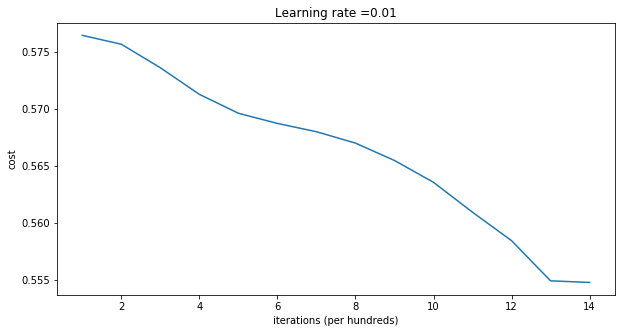

训练集：
Accuracy: 0.6733333333333333
测试集：
Accuracy: 0.64
[[1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
  1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
  0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
  1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
  1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
  0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1
  1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 1]]
[[1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0]]


In [14]:
# 测试随机初始化的学习效果
parameters = model(train_X, train_Y, initialization = "random",is_plot=True)
print("训练集：")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集：")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

print(predictions_train)
print(predictions_test)

E:\python\Learn\DL\improvement\init_utils.py:19: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


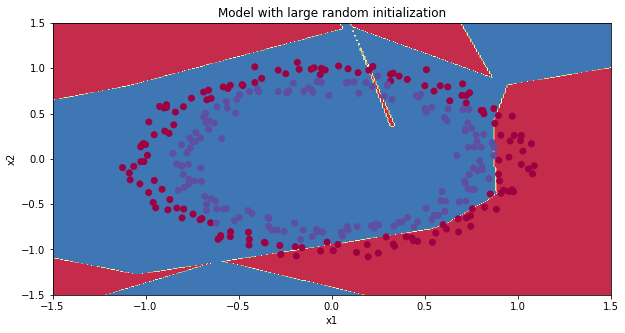

In [15]:
# 绘制边界
plt.title("Model with large random initialization")
ax = plt.gca()
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x:init_utils.predict_dec(parameters, x.T), train_X, train_Y)

可以看到因为初始化参数过大会造成一些预测值在0或1附近，之后会随着优化渐渐地拟合数据。但从损失来看，在目前较少的迭代数下，下降非常缓慢，而且有可能出现不变的情况，这说明出现了梯度爆炸或者消失，所以不利于机器学习

In [16]:
#  抑梯度异常初始化
def initialize_parameters_he(layers_dims):
    """
    参数：
        layers_dims - 列表，模型的层数和对应每一层的节点的数量
    返回
        parameters - 包含了所有W和b的字典
            W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[1],1）
            ···
            WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
            b1 - 偏置向量，维度为（layers_dims[L],1）
    """
    
    np.random.seed(3)               # 指定随机种子
    parameters = {}
    L = len(layers_dims)            # 层数
    
    for l in range(1, L):
        # 添加一个F系数，使得在反向传播时，dw增大从而达到抑制w大小的作用        
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))
        
    return parameters



In [17]:
# 测试抑梯度异常初始化
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


第0次迭代，成本值为：0.8830537463419761
第1000次迭代，成本值为：0.6879825919728063
第2000次迭代，成本值为：0.6751286264523371
第3000次迭代，成本值为：0.6526117768893807
第4000次迭代，成本值为：0.6082958970572938
第5000次迭代，成本值为：0.5304944491717495
第6000次迭代，成本值为：0.4138645817071794
第7000次迭代，成本值为：0.3117803464844441
第8000次迭代，成本值为：0.23696215330322562
第9000次迭代，成本值为：0.18597287209206836
第10000次迭代，成本值为：0.15015556280371817
第11000次迭代，成本值为：0.12325079292273552
第12000次迭代，成本值为：0.09917746546525932
第13000次迭代，成本值为：0.08457055954024274
第14000次迭代，成本值为：0.07357895962677362


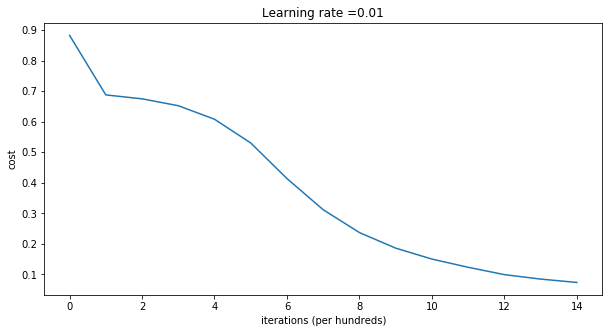

训练集:
Accuracy: 0.9933333333333333
测试集:


In [19]:
# 测试抑梯度异常初始化学习效果
parameters = model(train_X, train_Y, initialization = "he",is_plot=True)
print("训练集:")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集:")

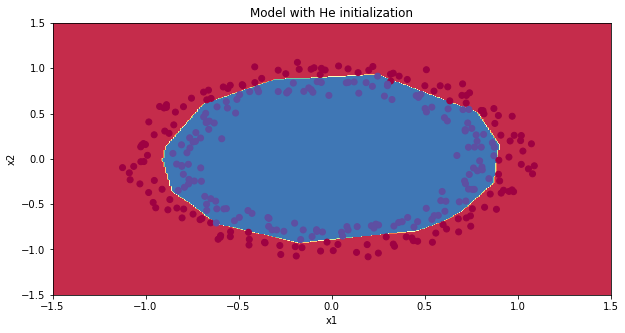

In [20]:
# 绘制边界
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, train_Y)

可以看出在相同的迭代下，He的损失在稳步下降，并且下降速度比较快，而且对数据更加拟合。

# 正则化

判断在图中哪个位置能够抢到头球，蓝色为能抢到，红色为不能。

## 加载数据

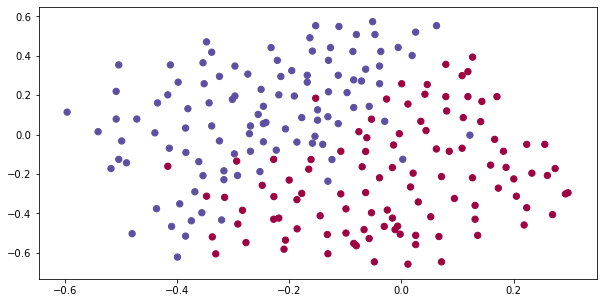

In [21]:
train_X, train_Y, test_X, test_Y = reg_utils.load_2D_dataset(is_plot=True)

In [22]:
#  建立一个三层模型，并带有不同正则化方式
def model(X,Y,learning_rate=0.3,num_iterations=30000,print_cost=True,is_plot=True,lambd=0,keep_prob=1):
    
    """
        参数：
            X - 输入的数据，维度为(2, 要训练/测试的数量)
            Y - 标签，【0 | 1】，维度为(1，对应的是输入的数据的标签)
            learning_rate - 学习速率
            num_iterations - 迭代的次数
            print_cost - 是否打印成本值，每迭代1000次打印一次
            initialization - 字符串类型，初始化的类型【"zeros" | "random" | "he"】
            is_polt - 是否绘制梯度下降的曲线图
            lambd - L2正则化超参数
            keep_prob - dorpout的存活概率
        
        返回：
            parameters - 学习后的参数
            
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims=[X.shape[0], 20, 3, 1]
    parameters = reg_utils.initialize_parameters(layers_dims)
    
    
    for i in range(0, num_iterations):
        # 前向传播
        # 不用dropout正则        
        if keep_prob == 1:
            a3, cache = init_utils.forward_propagation(X, parameters=parameters)
        elif keep_prob < 1:
            a3, cache = forward_progagation_dropout(X, parameters, keep_prob)
        else :
            print("dropout 正则化错误！")
            exit
        
        # 计算损失
        # 不用l2正则 
        if lambd == 0 :
            cost = reg_utils.compute_cost(a3, Y)
        else :
            cost = compute_cost_L2(a3, Y, parameters, lambd)
        
        # 不同时使用l2和dropout，但是实际也可以使用
        assert(lambd == 0 or keep_prob == 1)
            
        # 反向传播
        if lambd == 0 and keep_prob == 1:
            grads = reg_utils.backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_L2(X, Y, cache, lambd)
        else :
            grads = backward_propagation_dropout(X, Y, cache, keep_prob)
        # 跟新参数
        parameters = init_utils.update_parameters(parameters,grads,learning_rate)

        if i % 1000 == 0:
            costs.append(cost)
            # 打印成本
            if print_cost and i % 5000 == 0:
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))
        
    
    #学习完毕，绘制成本曲线
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per 1000)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    #返回学习完毕后的参数
    return parameters    

第0次迭代，成本值为：0.6557412523481002
第5000次迭代，成本值为：0.17620471758400452
第10000次迭代，成本值为：0.16329987525724216
第15000次迭代，成本值为：0.14796400922574265
第20000次迭代，成本值为：0.1385164242327309
第25000次迭代，成本值为：0.13285370211375952


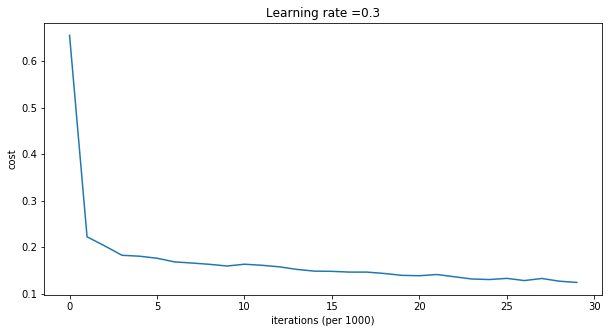

训练集:
Accuracy: 0.9478672985781991
测试集:
Accuracy: 0.915


In [23]:
# 不适用正则优化
parameters = model(train_X, train_Y,is_plot=True)
print("训练集:")
predictions_train = reg_utils.predict(train_X, train_Y, parameters)
print("测试集:")
predictions_test = reg_utils.predict(test_X, test_Y, parameters)

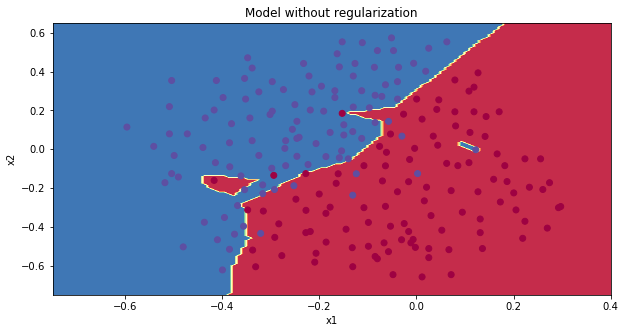

In [24]:
# 绘制边界
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x: reg_utils.predict_dec(parameters, x.T), train_X, train_Y)

可以看出其中有一些过拟合的点在蓝色和红色区域中。

## 正则化模型

### L2 正则化
在损失函数上增加Frobenius系数，可以在更新参数时，使dw增大从而使一些w减小来达到防止参数过大的问题
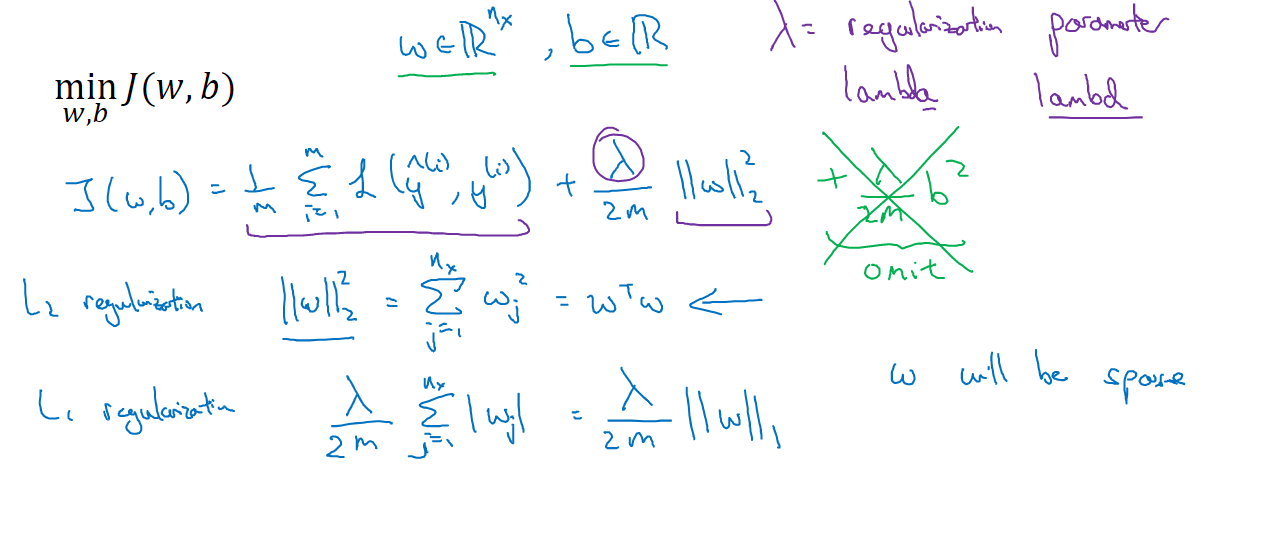
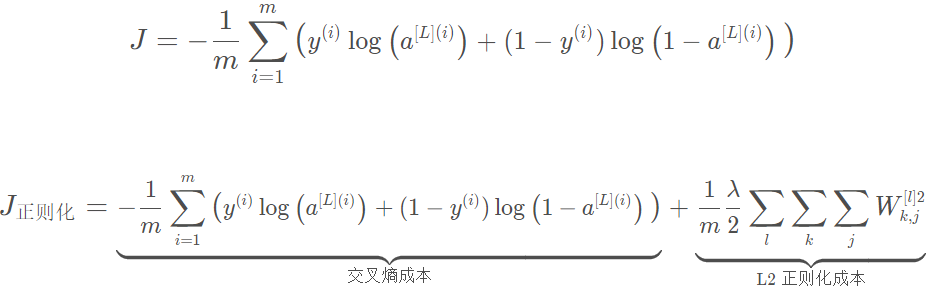

In [25]:
# L2 正则损失
def compute_cost_L2(a3, Y, parameters, lambd):
    """
        参数：
            a3 - 由最后一次激活函数产生的各个批次的预测值
            Y - 真实值的标签
            paramets - 各个layer产生的权重和偏置
            lambd - L2正则的超参数
            
        返回：
            final - 带有L2正则化系数的损失
    """
    
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    cost = reg_utils.compute_cost(a3, Y)
    L2_cost = (1 / m) * (lambd / 2) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    final_cost = cost + L2_cost
    
    return final_cost

In [26]:
#  L2正则反向传递
def backward_propagation_L2(X, Y, cache, lambd):
    """
        参数：
            X - 输入的数据
            Y - 标签
            caches - 在正向传播时记录的各个层的cache，包括linear和activation的cache
            lambd - L2正则的超参数
            
        返回：
            grads - 字典类型：
                    key：dw+层数 - value：每一层计算的权重梯度
                    key：db+层数 - value：每一层计算偏执梯度
    
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T) + (1. / m) * lambd * W3
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0)) 
    dW2 = np.dot(dz2, a1.T) + (1. / m) * lambd * W2
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T) + (1. / m) * lambd * W1
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

第0次迭代，成本值为：0.6974484493131264
第5000次迭代，成本值为：0.2690430474349705
第10000次迭代，成本值为：0.26849188732822393
第15000次迭代，成本值为：0.2682199033729047
第20000次迭代，成本值为：0.2680916337127301
第25000次迭代，成本值为：0.26794285663887024


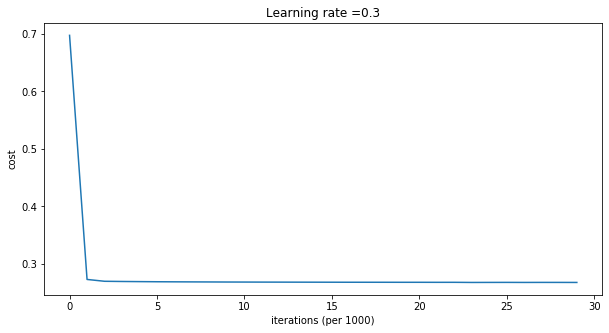

使用正则化，训练集:
Accuracy: 0.9383886255924171
使用正则化，测试集:
Accuracy: 0.93


In [27]:
parameters = model(train_X, train_Y, lambd=0.7,is_plot=True)
print("使用正则化，训练集:")
predictions_train = reg_utils.predict(train_X, train_Y, parameters)
print("使用正则化，测试集:")
predictions_test = reg_utils.predict(test_X, test_Y, parameters)

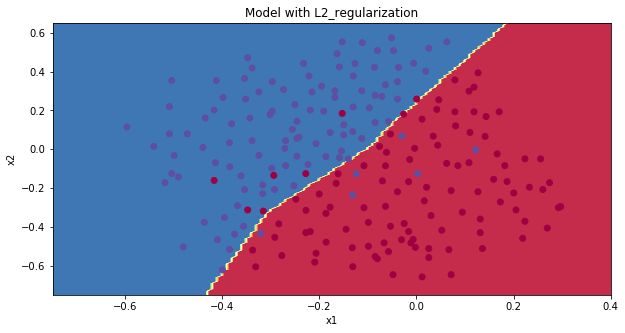

In [28]:
# 绘制边界
plt.title("Model with L2_regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x: reg_utils.predict_dec(parameters, x.T), train_X, train_Y)

通过L2正则化，比较好的拟合了数据，而且没有发生过拟合的现象出现

### Dropout
通过对参数进行概率性激活来达到丢去参数的效果，能够防止模型过度依赖某个w而导致该参数过大，keep.prob是指保留每个w参数的概率
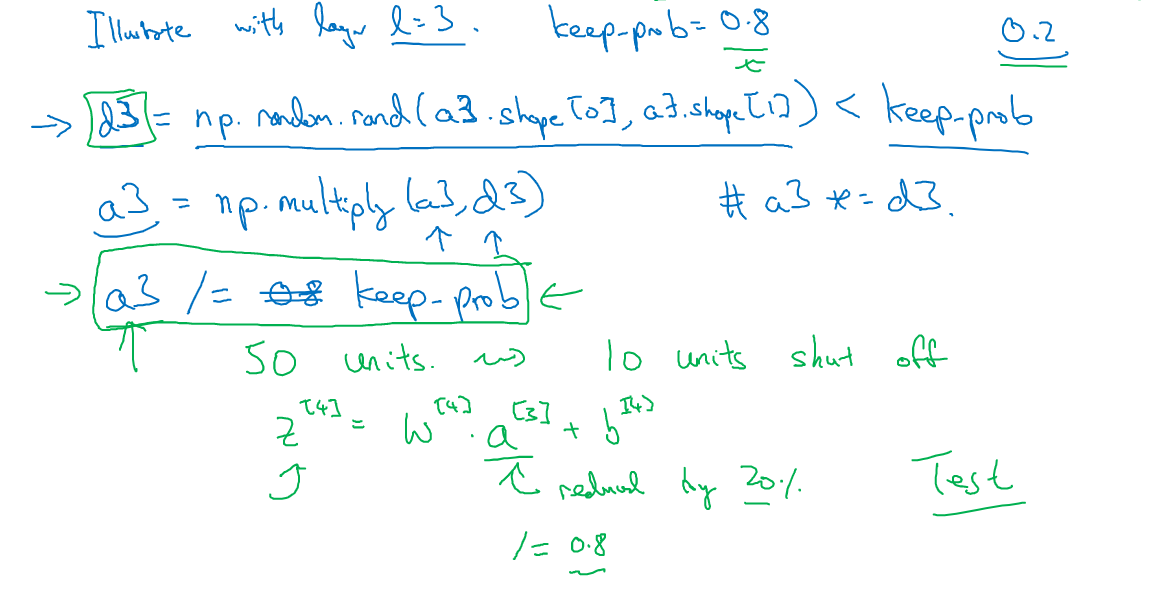

In [74]:
#  dropout 正向传播，为每一层添加dropout
def forward_progagation_dropout(X, parameters, keep_prob):
    
# 正向：
#   L1：A1           L2：A2          L3：A3         y^
#     |    drop(A1)    |    drop(A2)  |      A3    |
#     |    ——————>     |    ———————>  |    ——————> |
    
    """
        参数：
            X - 输入的数据
            parameters - 各个网络层随机产生的权重和偏置
            keep_prob - 感觉更像存活概率吧
            
        返回：
            a3 - 最后一次激活函数所产生的数值
            cache - 暂时存储的各个变量，用于反向传播时使用
    
    """
    
    np.random.seed(1)
    # 加载 parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    # 一般不对输入层做dropout    
    # d = np.random.rand(X.shape)
    # d = d < keep_prob
    # X = X * d
    # 保证期望相同    
    # X / = keep_prob 
    z1 = np.dot(W1, X) + b1
    a1 = reg_utils.relu(z1)
    # 针对第二层的dropout,由第一层产生     
    d1 = np.random.rand(a1.shape[0], a1.shape[1])
    d1 = d1 < keep_prob
    a1 = a1 * d1
    a1 = a1 / keep_prob 
    
    z2 = np.dot(W2, a1) + b2
    a2 = reg_utils.relu(z2)
    # 针对第三层的dropout，由第二层产生   
    d2 = np.random.rand(a2.shape[0], a2.shape[1])
    d2 = d2 < keep_prob
    a2 = a2 * d2
    a2 = a2 / keep_prob 
    
    z3 = np.dot(W3, a2) + b3
    a3 = reg_utils.sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3, d1, d2)
    
    return a3, cache    
    

In [77]:
def backward_propagation_dropout(X, Y, cache, keep_prob):
    
# 反向：
#   L1：A1           L2：A2           L3：A3         y^
#     |    drop(dA1)   |    drop(dA2)   |     A3    |
#     |    <——————     |    <———————    |   <—————— |
    
    """
        参数：
            X - 输入的数据
            Y - 标签
            caches - 在正向传播时记录的各个层的cache，包括linear和activation的cache，以及正向传播所使用的keep_prob
            keep_prob - 感觉更像存活概率吧
            
        返回：
            grads - 字典类型：
                    key：dw+层数 - value：每一层计算的权重梯度
                    key：db+层数 - value：每一层计算偏执梯度
    
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3, d1, d2) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    # 同理在反向的时候也要dropout，从第三层到第二层，作用于第二层   
    da2 = da2 * d2
    da2 = da2 / keep_prob
    
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    # 同理在反向的时候也要dropout，从第二层到第一层，作用于第一层   
    da1 = da1 * d1
    da1 = da1 / keep_prob
    
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

第0次迭代，成本值为：0.6543912405149825


E:\python\Learn\DL\improvement\reg_utils.py:121: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\python\Learn\DL\improvement\reg_utils.py:121: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


第5000次迭代，成本值为：0.06466905008519824
第10000次迭代，成本值为：0.0610169865749056
第15000次迭代，成本值为：0.06066457216128777
第20000次迭代，成本值为：0.060582435798513114
第25000次迭代，成本值为：0.06050179002362491


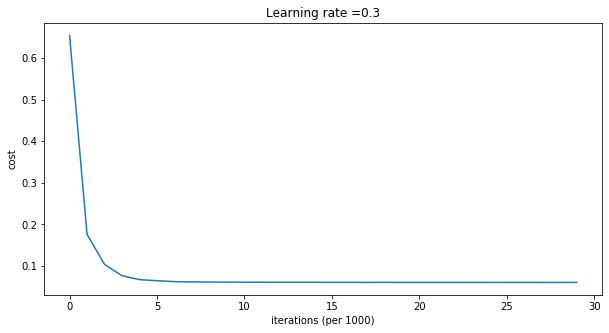

训练集：
Accuracy: 0.9289099526066351
测试集：
Accuracy: 0.95


In [78]:
parameters = model(train_X, train_Y, keep_prob = 0.86, )
print("训练集：")
pre_train = reg_utils.predict(train_X, train_Y, parameters=parameters)
print("测试集：")
pre_test = reg_utils.predict(test_X, test_Y, parameters=parameters)

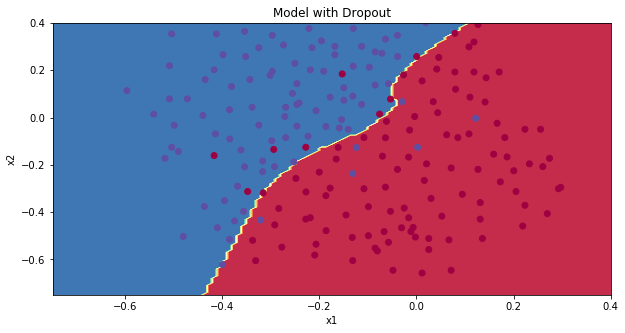

In [79]:
plt.title("Model with Dropout")
ax = plt.gca()
ax.set_xlim([-0.75,0.40])
ax.set_ylim([-0.75,0.40])
reg_utils.plot_decision_boundary(lambda x : reg_utils.predict_dec(parameters, x.T), train_X, train_Y)

# 梯度校验

相当于通过求导公式和倒数的意义来验证反向传播是否正确

### 一维验证

In [91]:
def forward_propagation(X, theta):
    J = np.dot(theta, X)
    return J

def backward_propagation(X, theta):
    d_theta = X
    return d_theta

def gradient_check(X, theta, epsilon=1e-7):
    theta_p = theta + epsilon
    theta_d = theta - epsilon
    J_p = forward_propagation(X, theta_p)
    J_d = forward_propagation(X, theta_d)
    grad_p = (J_p - J_d) / (2 * epsilon)
    
    grad = backward_propagation(X, theta)
    
    numerator = np.linalg.norm(grad - grad_p)
    denominator = np.linalg.norm(grad) + np.linalg.norm(grad_p)
    difference = numerator / denominator
    
    if difference < 1e-7:
        print("梯度检查：梯度正常!")
    else:
        print("梯度检查：梯度超出阈值!")
    
    return difference

In [92]:
#测试gradient_check
print("-----------------测试gradient_check-----------------")
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

-----------------测试gradient_check-----------------
梯度检查：梯度正常!
difference = 2.919335883291695e-10


### 高维验证

In [ ]:
# 实现一个神经网络
def forward_propagation_n(X,Y,parameters):
    """
    实现图中的前向传播（并计算成本）。
    
    参数：
        X - 训练集为m个例子
        Y -  m个示例的标签
        parameters - 包含参数“W1”，“b1”，“W2”，“b2”，“W3”，“b3”的python字典：
            W1  - 权重矩阵，维度为（5,4）
            b1  - 偏向量，维度为（5,1）
            W2  - 权重矩阵，维度为（3,5）
            b2  - 偏向量，维度为（3,1）
            W3  - 权重矩阵，维度为（1,3）
            b3  - 偏向量，维度为（1,1）
   
    返回：
        cost - 成本函数（logistic）
    """
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1,X) + b1
    A1 = gc_utils.relu(Z1)
    
    Z2 = np.dot(W2,A1) + b2
    A2 = gc_utils.relu(Z2)
    
    Z3 = np.dot(W3,A2) + b3
    A3 = gc_utils.sigmoid(Z3)
    
    #计算成本
    logprobs = np.multiply(-np.log(A3), Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = (1 / m) * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)

    return cost, cache

def backward_propagation_n(X,Y,cache):
    """
    实现图中所示的反向传播。
    
    参数：
        X - 输入数据点（输入节点数量，1）
        Y - 标签
        cache - 来自forward_propagation_n（）的cache输出
    
    返回：
        gradients - 一个字典，其中包含与每个参数、激活和激活前变量相关的成本梯度。
    """
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = (1. / m) * np.dot(dZ3,A2.T)
    dW3 = 1. / m * np.dot(dZ3, A2.T)
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    #dW2 = 1. / m * np.dot(dZ2, A1.T) * 2  # Should not multiply by 2
    dW2 = 1. / m * np.dot(dZ2, A1.T)
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1. / m * np.dot(dZ1, X.T)
    #db1 = 4. / m * np.sum(dZ1, axis=1, keepdims=True) # Should not multiply by 4
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
 
    return gradients



In [ ]:
# 开始验证
def gradient_check_n(parameters,gradients,X,Y,epsilon=1e-7):
    """
    检查backward_propagation_n是否正确计算forward_propagation_n输出的成本梯度
    
    参数：
        parameters - 包含参数“W1”，“b1”，“W2”，“b2”，“W3”，“b3”的python字典：
        grad_output_propagation_n的输出包含与参数相关的成本梯度。
        x  - 输入数据点，维度为（输入节点数量，1）
        y  - 标签“dW1”，“db1”，“dW2”，“db2”，“dW3”，“db3”的ppython字典，记录了在反向传播时的各个参数
        gradients - 包含
        epsilon  - 计算输入的微小偏移以计算近似梯度
    
    返回：
        difference - 近似梯度和后向传播梯度之间的差异
    """
    #初始化参数
    # 将字典转化为适量形式，就是将形状改变为[-1,1]的样子  
    parameters_values , keys = gc_utils.dictionary_to_vector(parameters) #keys用不到
    grad = gc_utils.gradients_to_vector(gradients)
    # 声明变量，准备接收各个参数+/-theta后的变量 
    num_parameters = parameters_values.shape[0]
    # 接收前向传播的改变各个参数后的损失     
    J_plus = np.zeros((num_parameters,1))
    J_minus = np.zeros((num_parameters,1))
    # 接收反向传播改变各个参数的梯度
    gradapprox = np.zeros((num_parameters,1))
    
    #计算gradapprox，每一个参数的改变都需要计算一个gradapprox
    for i in range(num_parameters):
        #计算J_plus [i]。输入：“parameters_values，epsilon”。输出=“J_plus [i]”
        thetaplus = np.copy(parameters_values)                                                  # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                             # Step 2
        # 其中需要将矢量形式改为字典类型，即变换形式，例如将权重改回[n^l, n^(l-1)]形状
        J_plus[i], cache = forward_propagation_n(X,Y,gc_utils.vector_to_dictionary(thetaplus))  # Step 3 ，cache用不到
        
        #计算J_minus [i]。输入：“parameters_values，epsilon”。输出=“J_minus [i]”。
        thetaminus = np.copy(parameters_values)                                                 # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                                           # Step 2        
        J_minus[i], cache = forward_propagation_n(X,Y,gc_utils.vector_to_dictionary(thetaminus))# Step 3 ，cache用不到
        
        #计算gradapprox[i]
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)
        
    #通过计算差异比较gradapprox和后向传播梯度。
    numerator = np.linalg.norm(grad - gradapprox)                                     # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                   # Step 2'
    difference = numerator / denominator                                              # Step 3'
    
    if difference < 1e-7:
        print("梯度检查：梯度正常!")
    else:
        print("梯度检查：梯度超出阈值!")
    
    return difference
